# Solution to a nonhomogeneous 2nd order ODE using CDM

Solve
    $$-u''(x) + 3u(x) = 3 - 8 \sin{(x)}, x \in (0, \pi), \\
    u(0) = 1, u'(\pi) = 2$$
by means of the finite difference method with 
number of subintervals n = 100.

---

Janno wants to keep O(dx^2) accuracy. This is how:

Discretizing our dif. eq.:
    $$-1 \cdot \frac{(u_{i+1} - 2 \cdot u_i + u_{i-1})}{\Delta x^2} + 3 \cdot u_i = f(x) $$
    $$-\frac{1}{\Delta x^2} \cdot u_{i+1} + \bigg( \frac{2}{\Delta x^2} + 3 \bigg) u_i - \frac{1}{\Delta x^2} \cdot u_{i-1} = f(x) $$

So the general notation would be:
    $$-\frac{p}{h^2} \cdot u_{i+1} + \bigg( \frac{2p}{h^2} + q \bigg) u_i - \frac{p}{h^2} \cdot u_{i-1} = f(x).$$

---

Now the rightside boundary condition:
    $$u'(\pi) = \frac{u_{i+1}(\pi) - u_{i-1}(\pi)}{2 \cdot h}$$

Shifting a bit
    $$u'(\pi) = \frac{u_{i+2}(\pi) - u_{i}(\pi)}{2 \cdot h}$$

So now we get constants for $A_{n+2}^{n+2}$ and $A_{n+2}^{n}$ respetively:
    $$A_{n+2}^{n+2} = \frac{1}{2 \cdot h} \quad A_{n+2}^{n} = -\frac{1}{2 \cdot h}$$
    
---

All of this in matrix notation:
$$ \begin{bmatrix}\frac{1}{2 \cdot h} & - \frac{p}{h^2} &   0 & ... & 0\\ - \frac{p}{h^2} & \bigg( \frac{2p}{h^2} + q \bigg) & - \frac{p}{h^2} & ... & 0 \\ ...& ... &  - \frac{p}{h^2} & \bigg( \frac{2p}{h^2} + q \bigg) & - \frac{p}{h^2}\\0& ... &  -\frac{1}{2 \cdot h} & 0 & \frac{1}{2 \cdot h} \\ \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \\ ... \\ u_{N+2} \end{bmatrix} = \begin{bmatrix} 3 - 8 \sin{(x_1)} \\ 3 - 8 \sin{(x_2)} \\ ... \\ 3 - 8 \sin{(x_{N+2})} \end{bmatrix} $$

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
L = np.pi
a = 1
b = 2
p = 1
q = 3
f = lambda x: 3 - 8*np.sin(x)
n = 100


In [88]:
h = L/n
x = np.linspace(0, L, n+2)
A = np.zeros((n+2, n+2))
y = np.zeros(n+2)

In [89]:
print(h)
1/(2*h)

0.031415926535897934


15.915494309189533

### Filling in the main elements of matrix A and vector y

In [90]:
A[0, 0] = a
y[0]    = a

for i in range(1, n+1):
    A[i, i-1] = -p/(h**2)
    A[i, i]   = 2*p/(h**2) + q
    A[i, i+1] = -p/(h**2)
    y[i] = f(x[i])

A[n+1, n-1] = -1/(2*h)
A[n+1, n+1] = 1/(2*h)
y[n+1] = b

In [91]:
for i in range(97, 102):
    for j in np.arange(97, 102):
        print(f"{A[i][j]:.10f}", end='\t')
    print()


2029.4236728468	-1013.2118364234	0.0000000000	0.0000000000	0.0000000000	
-1013.2118364234	2029.4236728468	-1013.2118364234	0.0000000000	0.0000000000	
0.0000000000	-1013.2118364234	2029.4236728468	-1013.2118364234	0.0000000000	
0.0000000000	0.0000000000	-1013.2118364234	2029.4236728468	-1013.2118364234	
0.0000000000	0.0000000000	-15.9154943092	0.0000000000	15.9154943092	


In [92]:
u = np.linalg.solve(A, y)
u[97:102]

array([0.75608023, 0.81853474, 0.88118767, 0.94397968, 1.00685137])

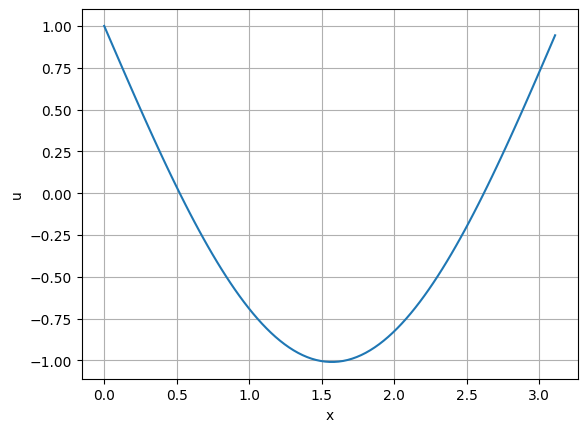

In [93]:

plt.plot(x[:-1], u[:-1])
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.show()